<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW5/FittingTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df_data = pd.read_csv('https://raw.githubusercontent.com/skumarudel/DSPS_SKumar/master/HW5/hbl2017.csv', comment='#', sep=',', header=None, names=['ID', 'x', 'y', 'sigmay', 'sigmax', 'rhoxy'])
df_data.head()

,ID,x,y,sigmay,sigmax,rhoxy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33


In [3]:
def line(x,parameters):
  '''
  function to fit line of any degree to the data,
  if parameters = 2, line fit
  if parameteres = 3, polynomial fit of second degree
  '''
  par_deg = len(parameters)

  func = 0
  for i in range(par_deg):
    func += parameters[i] * x**i
  return func

In [4]:
def plot_line(data, data_range, degree):
  '''
  This function takes data as dataframe
  you can also select the range of data you want to use using data_range, for example by giving range(4,20), range(10,20) etc
  you can also define the degree of polynomial fit using degree parameter, where degree=1 means line fit and degree=2 mean polynomial fit of second degree
  '''
  df = data.iloc[data_range]
  x = df.x.values
  dictt = {'0': np.ones(len(x))}
  for i in range(int(degree)):
    dictt[str(i+1)] = df.x**(i+1)

  A = np.column_stack(tuple(dictt.values()))
  Y = (np.array(df.y.values)).reshape(-1,1)
  C = np.diag(df.sigmay.values**2)
  X = np.dot(np.linalg.inv(np.dot(A.T, np.dot(np.linalg.inv(C), A))), np.dot(A.T, np.dot(np.linalg.inv(C), Y)))
  Covariance = np.linalg.inv(np.dot(A.T, np.dot(np.linalg.inv(C), A)))
  parameters = X.flatten()
  variances = np.diagonal(Covariance)
  
  xx = np.linspace(0,300,20)
  fig,axes = plt.subplots(figsize=(6,6))
  axes.errorbar(df.x, df.y, yerr=df.sigmay, linestyle='', marker='o', capsize=3, color='black')
  axes.plot(xx, line(xx, parameters = parameters), color='black')
  if degree == 1:
    text_label = "$y = ({:.2f} \pm {:.2f})x + ({:.0f} \pm {:.0f})$".format(parameters[1],np.sqrt(variances[1]), parameters[0],np.sqrt(variances[0]))
    axes.text(100,100, s = text_label, fontsize=11, fontweight='bold')
  elif degree == 2:
    text_label = "$y = ({param2:.4f} \pm {err2:.4f})x^{{2}} + ({param1:.2f} \pm {err1:.2f})x +({param0:.0f} \pm {err0:.0f})$".format(param2=parameters[2], err2=np.sqrt(variances[2]), param1=parameters[1], err1=np.sqrt(variances[1]), param0=parameters[0], err0=np.sqrt(variances[0]))
    axes.text(40,100, s = text_label, fontsize=11, fontweight='bold')
  axes.text(50,50, s = "Standard uncertainty variance on m = {:.3f}".format(variances[1]), fontsize=10, fontweight='bold')
  plt.xlim(0,300)
  plt.ylim(0,700)
  plt.xlabel('x')
  plt.ylabel('y')
  #print(parameters, np.sqrt(variances))


#Excercise 1     [Reference Paper](https://cosmo.nyu.edu/hogg/research/2010/08/17/straightline.pdf)

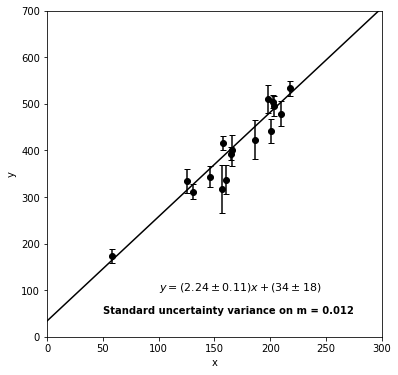

In [5]:
plot_line(data=df_data, data_range=range(4,20), degree=1)

Above plot shows the demonstration of fitting a line to data points from 5 to 20 in the data frame (df_data) using the matrix algebra.Standard uncertainity on the varince is given by the diagonal element of the covarinace matrix and is annotated on the plot (m = 0.012)

#Excercise 2     [Reference Paper](https://cosmo.nyu.edu/hogg/research/2010/08/17/straightline.pdf)

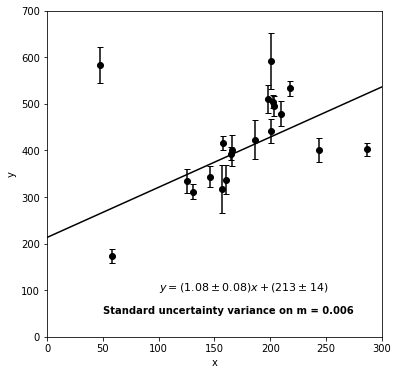

In [6]:
plot_line(data=df_data, data_range=range(0,20), degree=1)

Above plot shows the demonstration of fitting a line to all the data points in the data frame (df_data) using the matrix algebra. Standard uncertainity on the varince is given by the diagonal element of the covarinace matrix and is annotated on the plot (m = 0.006). You can also see that adding 4 more points pull the line at the higher end to lower side and to the lower end to higher side. This is because the points which are to far away from the line (kind of outliers) dominate the sum-of-the-squares calculation in chi2 formula (equ 7 in paper), and lead to a different slope (misleading results).

#Excercise 3     [Reference Paper](https://cosmo.nyu.edu/hogg/research/2010/08/17/straightline.pdf)

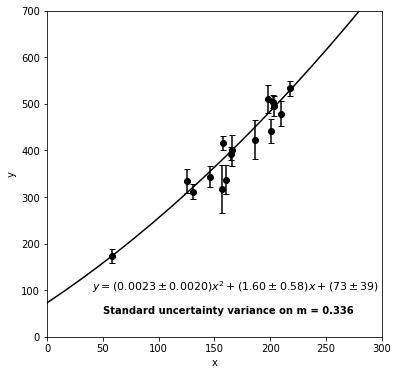

In [7]:
plot_line(data=df_data, data_range=range(4,20), degree=2)

Results of fitting a second order polynomial to the data points from 5 to 20 in the data frame (df_data). You can see that the coefficients of the quadratic term (x sqaure) are pretty small and not very significant looking at the coef/coef_err ratio

#Excercise 4     [Reference Paper](https://cosmo.nyu.edu/hogg/research/2010/08/17/straightline.pdf)

* Likelihood function 
* Maximizing Likelihood function with respect to parameteres we want to find

Here we will use the classical maximum liklihood approach to find the parameter of interest(T).Given a single observation $t_{i}$, we can compute the probability of this measurement given it is generated from a Gaussian model having a mean of T (parameter of interest) and errors on measurements $\sigma_{ti}$:
\begin{equation}
P(t_{i}| T) = \frac{1}{\sqrt{2\pi \sigma_{ti}^2}}\exp\Big[\frac{-(t_{i} - T)^2}{2\sigma_{ti}^2}\Big]
\end{equation}

We construct the likelihood function by computing the product of the probabilities for each data point:

\begin{equation}
L(D|T) = \prod\limits_{i=1}^n P(t_{i} | T)
\end{equation}
Here D represents the entire set of measurements ($t_{1}$, $t_{2}$ ..$t_{n}$).Because the value of the likelihood can become very small, it is often more convenient to instead compute the log-likelihood. Combining the previous two equations and computing the log

\begin{equation}
\log L = -\frac{1}{2} \sum\limits_{i=1}^n \Big[ \log(2\pi \sigma_{ti}^2) + \frac {(t_{i} - T)^2}{\sigma_{ti}^2}\Big]
\end{equation}


What we'd like to do is determine $T$ by maximizing the log-likelihood. For this simple problem, the maximization can be done numerically or analytically. I will use analytical method here.

First term from last equation will be zero since it does not depend upon T

\begin{equation}
\frac{d logL}{dT} = \sum\limits_{i=1}^n \frac{(t_{i} - T)}{\sigma_{ti}^{2}}
\end{equation}

For maximizing, equate the derivative to zero:

\begin{equation}
\frac{d logL}{dT} = 0
\end{equation}

\begin{equation}
 \sum\limits_{i=1}^n \frac{(t_{i} - T)}{\sigma_{ti}^{2}} = 0
\end{equation}

\begin{equation}
 \sum\limits_{i=1}^n \frac{t_{i}}{\sigma_{ti}^{2}} = T \sum\limits_{i=1}^n \frac{1}{\sigma_{ti}^{2}}
\end{equation}


Rearrange and using simple algebra:

\begin{equation}
 T = \frac{\sum\limits_{i=1}^n \frac{t_{i}}{\sigma_{ti}^{2}}}{\sum\limits_{i=1}^n \frac{1}{\sigma_{ti}^{2}}}
\end{equation}

define $$w_{i} = \frac{1}{\sigma_{ti}^2}$$

\begin{equation}
 T = \frac{\sum\limits_{i=1}^n w_{i}t_{i}}{\sum\limits_{i=1}^n w_{i}}
\end{equation}

**Equation of weighted mean**. Hence proved



---

<h1 style="color:red"> Awesome !</h1>
